# Scraping pdf

In [1]:
import PyPDF2

In [37]:
def read_and_write_pdf(fileName):
    keys = ["publish", "produc", "test", "launch",
        "help", "research", "advice", "gather", "guidance", "monetary", "inquir", "resolut"]
    fileNameFull = fileName + '.pdf'
    pdfFileObj = open(fileNameFull, 'rb')
    pdfReader = PyPDF2.PdfFileReader(pdfFileObj)
    pageNum = pdfReader.numPages
    text = []
    for i in range(pageNum):
        pageObj = pdfReader.getPage(i)
        text.append(pageObj.extractText())
    
    key_sts = []
    for t in text:
        sts = t.replace('\n', '').replace('No. ','No.').replace('Nos. ', 'Nos.').split('. ')
        for s in sts:
            for k in keys:
                if k in s.lower():
                    key_sts.append(s)
    txtFileName = fileName + '.txt'
    with open(txtFileName, 'w') as f:
        for item in key_sts:
            f.write("%s\n" % item)

In [1]:
import pandas as pd

In [2]:
df = pd.read_excel("buget-hr-fine-complaints.xlsx")

In [3]:
df.columns

Index(['Country', 'Budget (Euros)', 'HR (number)', 'Unnamed: 3',
       '# of Fines (as of Oct 2019)', '# of Fines (as of Nov 2019)',
       '# of Fines (as of Dec 2019)', '# of Fines (as of May 2020)',
       '# of Fines (as of Oct 2020)', 'Total Fines',
       '# of GDPR Complaints (as of Oct 2019)',
       '# of GDPR Complaints (as of Nov 2019)',
       '# of GDPR Complaints (as of Dec 2019)',
       '# Complaints (as of May 2020)', '# of Complaints (as of Oct 2020)',
       'Total Complaints', 'Fined big tech?', 'Unnamed: 17', 'Unnamed: 18',
       'Unnamed: 19', 'Unnamed: 20', 'Conversion'],
      dtype='object')

In [3]:
df_temp = df[['Budget (Euros)', 'HR (number)', 'Total Fines','Total Complaints']]

# Pearson coefficients

## Pairwise pearson coefficients

In [4]:
df[['Budget (Euros)', 'HR (number)', 'Total Fines','Total Complaints']].corr()

,Budget (Euros),HR (number),Total Fines,Total Complaints
Budget (Euros),1.000000,0.966734,0.628245,0.917254
HR (number),0.966734,1.000000,0.617611,0.939843
Total Fines,0.628245,0.617611,1.000000,0.468738
Total Complaints,0.917254,0.939843,0.468738,1.000000


In [11]:
# df_temp.rename('Budget', 'Staff', 'Fines', 'Complaints')
df_temp = df_temp.set_axis(['Budget', 'Staff', 'Fines', 'Complaints'], axis=1, inplace=False)

## Pearson coefficients with p values

In [6]:
import scipy.stats
import statsmodels.formula.api as smf

In [18]:
scipy.stats.pearsonr(df_temp['Budget (Euros)'], df_temp['Total Fines'])

(0.6282453104843603, 0.00020137167395129944)

In [19]:
scipy.stats.pearsonr(df_temp['HR (number)'], df_temp['Total Fines'])

(0.6176108063047674, 0.00027670719204635376)

In [22]:
scipy.stats.pearsonr(df_temp['Total Complaints'], df_temp['Total Fines'])

(0.46873751271313363, 0.008982397198999622)

# Linear regressions

Full linear regression y = budgets, x = fines

In [13]:
lm = smf.OLS(df_temp.Budget, df_temp.Fines).fit()

In [14]:
lm.rsquared

0.530216491652072

In [16]:
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                 Budget   R-squared:                       0.530
Model:                            OLS   Adj. R-squared:                  0.514
Method:                 Least Squares   F-statistic:                     32.73
Date:                Mon, 12 Oct 2020   Prob (F-statistic):           3.43e-06
Time:                        12:13:27   Log-Likelihood:                -534.23
No. Observations:                  30   AIC:                             1070.
Df Residuals:                      29   BIC:                             1072.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Fines       2.831e+05   4.95e+04      5.721      0.0

## Find residuals using studentized residuals

In [18]:
infl = lm.get_influence()

In [24]:
infl.resid_studentized_external

array([-0.63567762,  0.27111749, -0.31213435,  0.06443489, -0.48876127,
        0.10674288,  0.246919  ,  0.01356545,  0.15371336,  0.96493103,
        2.22848336, -0.25024766, -0.71862439,  0.12579463,  1.14630079,
        1.59857873, -0.35090787, -0.0159875 ,  0.40229038, -0.61986148,
        1.25947029,  0.19150333,  0.24084153,  0.01253408, -0.8145001 ,
       -0.12296943,  0.16534447, -2.14915855,  0.52610012,  5.37340944])

In [27]:
df_outliers_by_budget = {"Country":df.Country, "Budget_External_Studentized_Resid": infl.resid_studentized_external}

In [29]:
df_outliers_by_budget = pd.DataFrame(data=df_outliers_by_budget)

In [30]:
df_outliers_by_budget

,Country,Budget_External_Studentized_Resid
0,Austria,-0.635678
1,Belgium,0.271117
2,Bulgaria,-0.312134
3,Croatia,0.064435
4,Cyprus,-0.488761
5,Czech Rep.,0.106743
6,Denmark,0.246919
7,Estonia,0.013565
8,Finland,0.153713
9,France,0.964931


## Linear regression w/o UK

In [32]:
lm_2 = smf.OLS(df_temp.Budget[:-1], df_temp.Fines[:-1]).fit()

In [34]:
print(lm_2.summary())

                            OLS Regression Results                            
Dep. Variable:                 Budget   R-squared:                       0.693
Model:                            OLS   Adj. R-squared:                  0.682
Method:                 Least Squares   F-statistic:                     63.23
Date:                Mon, 12 Oct 2020   Prob (F-statistic):           1.17e-08
Time:                        12:30:26   Log-Likelihood:                -506.64
No. Observations:                  29   AIC:                             1015.
Df Residuals:                      28   BIC:                             1017.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Fines        2.81e+05   3.53e+04      7.952      0.0

In [42]:
import matplotlib.pyplot as plt
import numpy as np

In [45]:
indices = np.argsort(df_temp.Fines)
sort_fine = np.sort(df_temp.Fines)

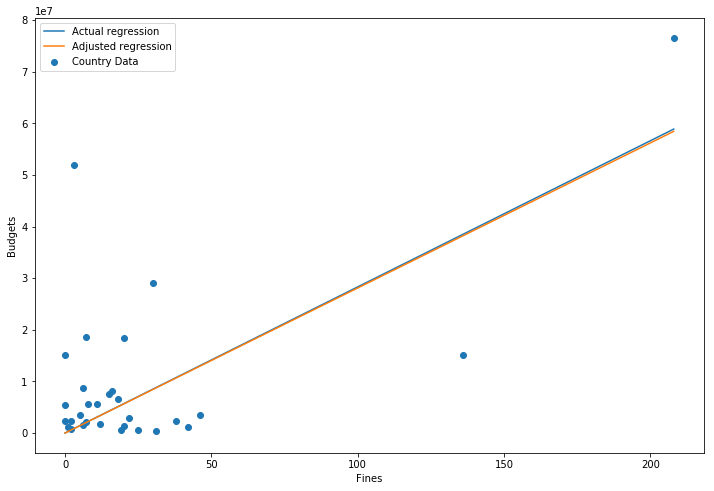

In [50]:
%matplotlib inline 
plt.rcParams['figure.figsize'] = (12, 8)
plt.scatter(sort_fine, df_temp.Budget[indices], label = "Country Data")
plt.plot(sort_fine, lm.predict(sort_fine), label = "Actual regression")
plt.plot(sort_fine, lm_2.predict(sort_fine), label = "Adjusted regression")
plt.ylabel("Budgets")
plt.xlabel("Fines")
plt.legend()

In [67]:
fineDB = pd.read_csv('finedb.csv')

In [68]:
artDb = fineDB[['Fine', 'QuotedArt']]

In [69]:
artDb = artDb.join(artDb.QuotedArt.str.replace("\n", "").replace("\xa0", " ").str.split(",",expand=True))

In [66]:
' Art. 9 '.strip()

'Art. 9'

In [ ]:
artDb[0].unique()

In [15]:
quotedArt = artDb.QuotedArt

In [17]:
totalQuotedArt = []
for art in quotedArt:
    totalQuotedArt.extend(art.split(','))

In [70]:
totalUniqueQuotedArt = []
for i in range(6):
    totalUniqueQuotedArt.extend(artDb[i].unique())

In [75]:
artDb.columns = ['Fine', 'QuotedArt', '0', '1', '2', '3', '4', '5']

In [80]:
newArtDb = pd.melt(artDb, id_vars=['Fine', 'QuotedArt'])

In [92]:
newArtDb = newArtDb.dropna()

In [97]:
newArtDb['value'] = newArtDb['value'].apply(lambda x: str(x).strip())

/Users/rainyleon/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [104]:
newArtDb.to_csv("pivotedFineData.csv", index=False)

In [101]:
len(newArtDb.value.unique())

65

In [106]:
newArtDb['value'] = newArtDb['value'].apply(lambda x: str(x).strip()[:7].strip())

/Users/rainyleon/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [107]:
newArtDb.to_csv("wellPivotedFineData.csv", index=False)

In [ ]:
newArtDb[newArtDb.QuotedArt] = df_obj.apply(lambda x: x.str.strip())